[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


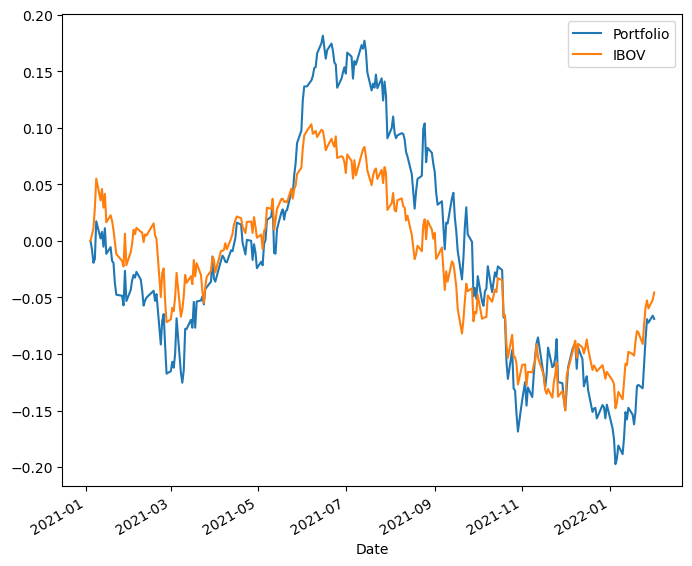

In [3]:
import PySimpleGUI as sg
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

sg.theme('Reddit')

# Initialize empty lists and variables
assets = []
value_invested = []
inicio = ''
fim = ''
portfolio = {}
fig, ax = plt.subplots(figsize=(8, 8))

# Define the GUI layout
layout = [
    [sg.Text('Insira o ticker do ativo, ex.: VALE3'), sg.InputText()],
    [sg.Text('Insira o valor alocado no ativo'), sg.InputText()],
    [sg.Text('Insira a data de inicio do investimento, formato AAAA-MM-DD'), sg.InputText()],
    [sg.Text('Insira a data final de investimento, formato AAAA-MM-DD'), sg.InputText()],
    [sg.Button('Add Ativo'), sg.Button('Gerar Grafico'), sg.Button('Cancel')],
    [sg.Canvas(key='-CANVAS-')]
]

# Create the GUI window
window = sg.Window('Investment Portfolio Visualizer', layout)

# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == 'Cancel':
        break
    elif event == 'Add Ativo':
        # Get user input values and add them to the corresponding lists
        asset = values[0] + '.SA'  # Convert ticker to Yahoo Finance format
        assets.append(asset)
        value_invested.append(float(values[1]))
        inicio = values[2]
        fim = values[3]
        sg.popup(f'{asset} cadastrado com sucesso!')   
    elif event == 'Gerar Grafico':
        if not assets:
            sg.popup('Adicione pelo menos um ativo para gerar o gráfico.')
            continue
        try:
            # Download the historical prices for the selected stocks
            prices = yf.download(assets, start=inicio, end=fim)['Adj Close']
            # Calculate the portfolio composition based on investment amount
            portfolio = pd.Series(data=value_invested, index=assets)
            weights = portfolio / portfolio.sum()
            # Calculate the portfolio value over time
            values = (prices * weights).sum(axis=1)
            # Calculate the index value over time
            ibov = yf.download('^BVSP', start=inicio, end=fim)['Adj Close']
            # Combine portfolio and index values into a single DataFrame
            df = pd.concat([values, ibov], axis=1)
            df.columns = ['Portfolio', 'IBOV']
            # Calculate and plot the cumulative returns over time
            cum_returns = (df / df.iloc[0] - 1).fillna(0)
            cum_returns.plot(figsize=(8, 8), ax=ax)
            canvas = FigureCanvasTkAgg(fig, master=window['-CANVAS-'].TKCanvas)
            canvas.draw()
            canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
            window.refresh()  # Update the window to show the plot
        except Exception as e:
            sg.popup(f'Erro ao gerar gráfico: {str(e)}')
            
# Close the GUI window when done
window.close()
